# Import Required Libraries

In [26]:
# Data handling
import pandas as pd  #Data ko table ki form mei load aur manipulate krne ke liye
import numpy as np   

# Visualization
import seaborn as sns   #charts banane ke liye
import matplotlib.pyplot as plt  #Plot banane ka basic tool

# Display plots inline (Kaggle notebook may already have it)
%matplotlib inline  

# Load Dataset

In [27]:
# Dataset load
df = pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Dataset Cleaning and Initial Inspection

In [28]:
# Dataset ka size (rows, columns)
print("Shape of the dataset:", df.shape)

# Columns aur unka data type
print("\nDataset Info:")
print(df.info())

# Missing values check karein
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# First few rows dekh lein (optional, already done before)
df.head()

Shape of the dataset: (1000, 8)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None

Missing Values in Each Column:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score               

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Column Cleaning (Optional) + Label Encoding (Important)

In [29]:
from sklearn.preprocessing import LabelEncoder

# Column names thora sa clean kar lein (optional but useful)
df.columns = [col.lower().replace(" ", "_") for col in df.columns]

# Label Encoding for categorical columns
categorical_cols = ['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Dekhein encoded dataframe
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


# Correlation Matrix Visualization

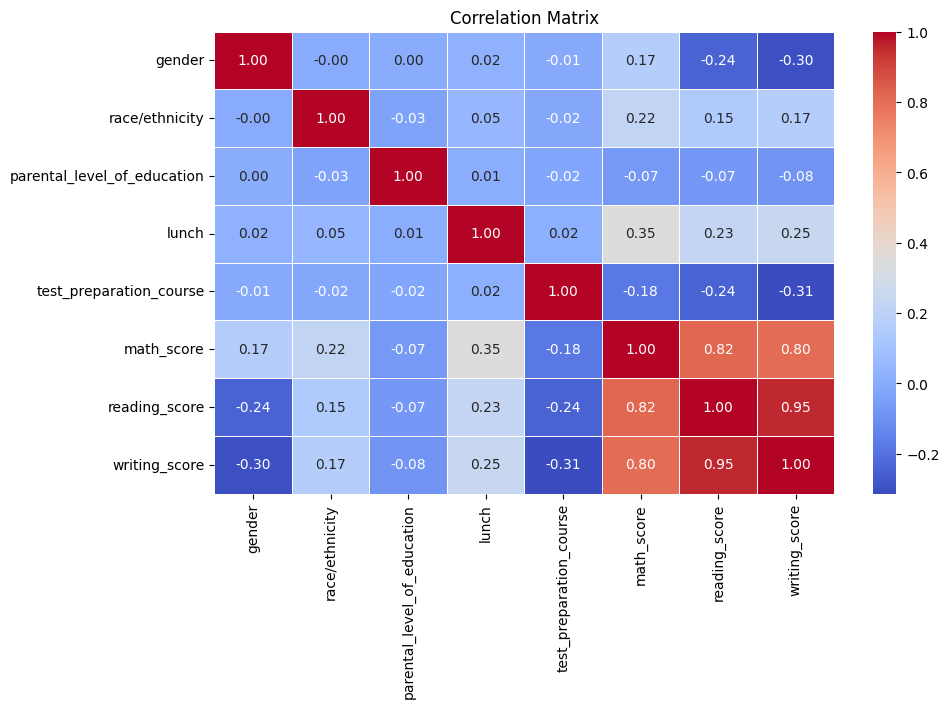

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Pairplots and Individual Visualizations

# A. Pairplot of Scores

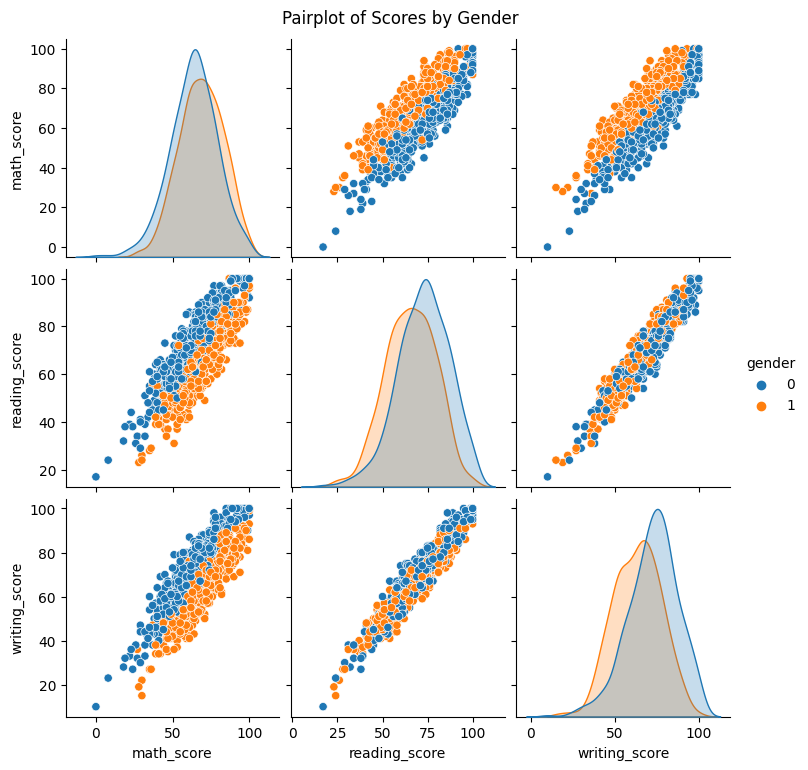

In [31]:
import warnings
warnings.filterwarnings("ignore")
sns.pairplot(df, vars=['math_score', 'reading_score', 'writing_score'], hue='gender')
plt.suptitle("Pairplot of Scores by Gender", y=1.02)
plt.show()

# B. Boxplot: Math Score vs Test Preparation Course

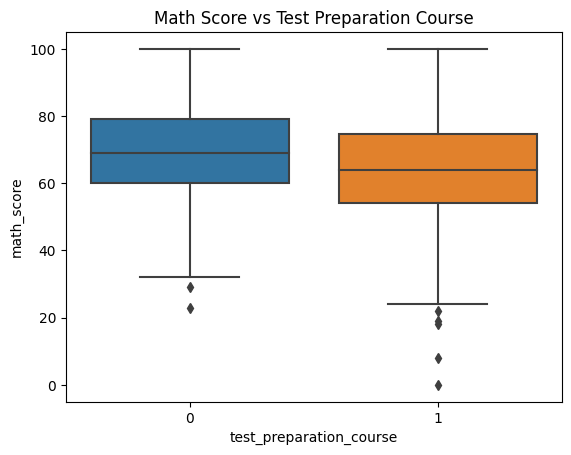

In [32]:
sns.boxplot(x='test_preparation_course', y='math_score', data=df)
plt.title("Math Score vs Test Preparation Course")
plt.show()

# C. Boxplot: Writing Score vs Parental Education

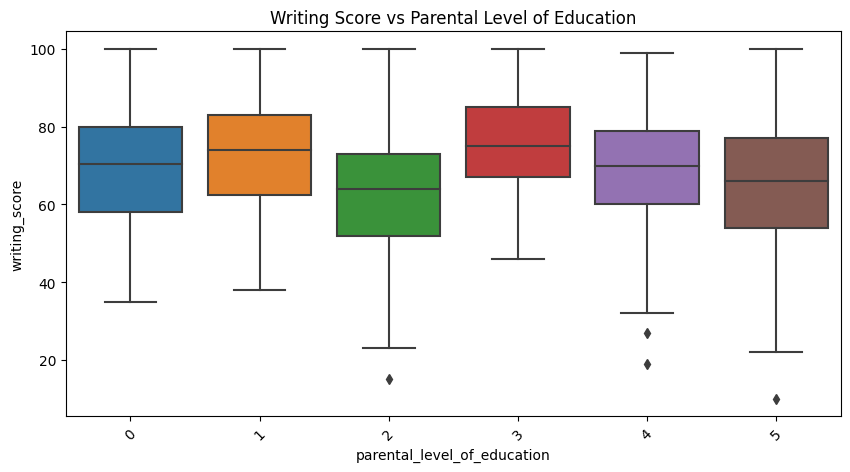

In [33]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='parental_level_of_education', y='writing_score', data=df)
plt.xticks(rotation=45)
plt.title("Writing Score vs Parental Level of Education")
plt.show()
# bachelor's degree=1, high school=2, master's degree=3, some college=4, some high school=5

# D. Barplot: Average Reading Score by Lunch Type

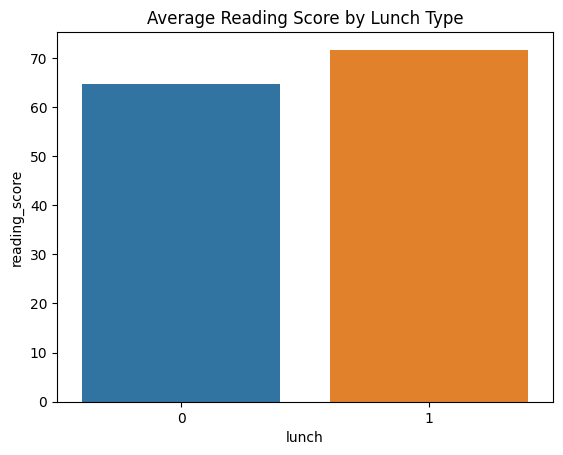

In [34]:
sns.barplot(x='lunch', y='reading_score', data=df, ci=None)
plt.title("Average Reading Score by Lunch Type")
plt.show()

# Model 1: SVM Classification

 SVM Accuracy: 0.87

 Classification Report:
               precision    recall  f1-score   support

        High       0.80      0.73      0.76        33
         Low       0.93      0.89      0.91        63
      Medium       0.85      0.90      0.88       104

    accuracy                           0.87       200
   macro avg       0.86      0.84      0.85       200
weighted avg       0.87      0.87      0.87       200



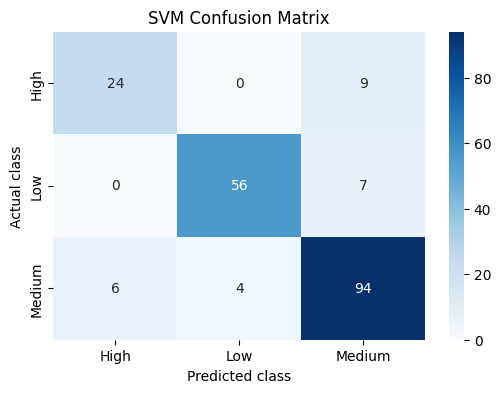

In [35]:
# Step 1: Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load the Dataset
df = pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")

# Step 3: Convert 'writing score' into 3-class Category
def categorize(score):
    if score < 60:
        return 'Low'
    elif score <= 80:
        return 'Medium'
    else:
        return 'High'

df['writing_score_category'] = df['writing score'].apply(categorize)
df = df.drop(columns=['writing score'])  # Drop original score column

# Step 4: Encode Categorical Columns
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Step 5: Define X and y
X = df.drop(columns=['writing_score_category'])
y = df['writing_score_category']

# Encode Target
target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Step 7: Train SVM Model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Step 8: Predict and Evaluate
y_pred_svm = svm_model.predict(X_test)

# Accuracy & Report
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_report = classification_report(y_test, y_pred_svm, target_names=target_encoder.classes_)

# Step 9: Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Print Results
print(f" SVM Accuracy: {svm_accuracy:.2f}")
print("\n Classification Report:\n", svm_report)

# Step 10: Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues",
            xticklabels=target_encoder.classes_,
            yticklabels=target_encoder.classes_)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.show()

# Model 2: Decision Tree Classifier

 Decision Tree Accuracy: 0.85

 Classification Report:
               precision    recall  f1-score   support

        High       0.71      0.73      0.72        33
         Low       0.92      0.94      0.93        69
      Medium       0.86      0.84      0.85        98

    accuracy                           0.85       200
   macro avg       0.83      0.84      0.83       200
weighted avg       0.86      0.85      0.85       200



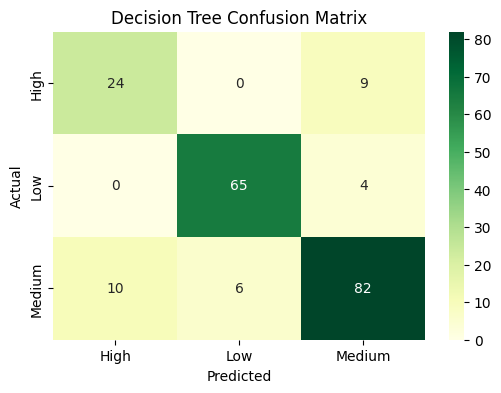

In [36]:
# Step 1: Import Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Dataset
df = pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")

# Step 3: Convert 'writing score' into Categories (Low, Medium, High)
def categorize(score):
    if score <= 60:
        return 'Low'
    elif score <= 80:
        return 'Medium'
    else:
        return 'High'

df['writing_score_category'] = df['writing score'].apply(categorize)
df.drop(columns=['writing score'], inplace=True)

# Step 4: Encode Categorical Columns
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Step 5: Prepare Features and Target
X = df.drop(columns=['writing_score_category'])
y = df['writing_score_category']

# Encode target labels
target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)

# Step 6: Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Step 7: Train Decision Tree Classifier with Parameters
dt_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
dt_model.fit(X_train, y_train)

# Step 8: Predict and Evaluate
y_pred_dt = dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_report = classification_report(y_test, y_pred_dt, target_names=target_encoder.classes_)
cm_dt = confusion_matrix(y_test, y_pred_dt)

print(f" Decision Tree Accuracy: {dt_accuracy:.2f}")
print("\n Classification Report:\n", dt_report)

# Step 9: Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="YlGn",
            xticklabels=target_encoder.classes_,
            yticklabels=target_encoder.classes_)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Model 3: Random Forest Classifier

 Random Forest Accuracy: 0.88

 Classification Report:
               precision    recall  f1-score   support

        High       0.77      0.70      0.73        33
         Low       0.97      0.91      0.94        69
      Medium       0.85      0.91      0.88        98

    accuracy                           0.88       200
   macro avg       0.86      0.84      0.85       200
weighted avg       0.88      0.88      0.87       200



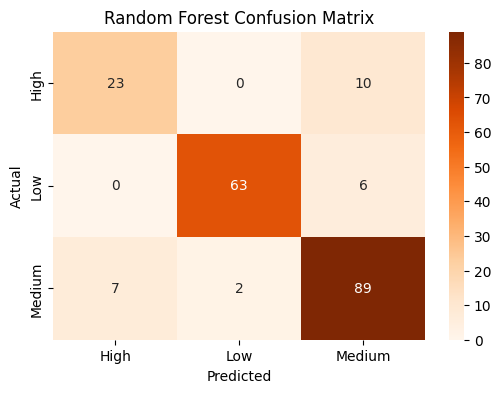

In [37]:
# Full Random Forest Classification Block

# Step 1: Import Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Dataset
df = pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")

# Step 3: Convert Writing Score to Categories
def categorize(score):
    if score <= 60:
        return 'Low'
    elif score <= 80:
        return 'Medium'
    else:
        return 'High'

df['writing_score_category'] = df['writing score'].apply(categorize)
df.drop(columns=['writing score'], inplace=True)

# Step 4: Encode Categorical Features
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Step 5: Prepare Features and Target
X = df.drop(columns=['writing_score_category'])
y = df['writing_score_category']

target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)

# Step 6: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Step 7: Train Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
rf_model.fit(X_train, y_train)

# Step 8: Predict and Evaluate
y_pred_rf = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf, target_names=target_encoder.classes_)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print(f" Random Forest Accuracy: {rf_accuracy:.2f}")
print("\n Classification Report:\n", rf_report)

# Step 9: Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Oranges",
            xticklabels=target_encoder.classes_,
            yticklabels=target_encoder.classes_)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Model 4: KNN classifier

 KNN Accuracy: 0.83

 Classification Report:
               precision    recall  f1-score   support

        High       0.79      0.67      0.72        33
         Low       0.95      0.81      0.87        69
      Medium       0.79      0.91      0.84        98

    accuracy                           0.83       200
   macro avg       0.84      0.80      0.81       200
weighted avg       0.84      0.83      0.83       200



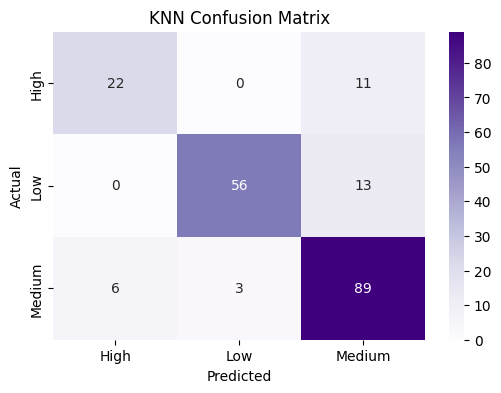

In [38]:
# Full KNN Classification Block

# Step 1: Import Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Dataset
df = pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")

# Step 3: Convert Writing Score to Categories
def categorize(score):
    if score <= 60:
        return 'Low'
    elif score <= 80:
        return 'Medium'
    else:
        return 'High'

df['writing_score_category'] = df['writing score'].apply(categorize)
df.drop(columns=['writing score'], inplace=True)

# Step 4: Encode Categorical Features
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Step 5: Prepare Features and Target
X = df.drop(columns=['writing_score_category'])
y = df['writing_score_category']

target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)

# Step 6: Feature Scaling (IMPORTANT for KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 7: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Step 8: Train KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Step 9: Predict and Evaluate
y_pred_knn = knn_model.predict(X_test)

knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_report = classification_report(y_test, y_pred_knn, target_names=target_encoder.classes_)
cm_knn = confusion_matrix(y_test, y_pred_knn)

print(f" KNN Accuracy: {knn_accuracy:.2f}")
print("\n Classification Report:\n", knn_report)

# Step 10: Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Purples",
            xticklabels=target_encoder.classes_,
            yticklabels=target_encoder.classes_)
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Comparision of 4 Models

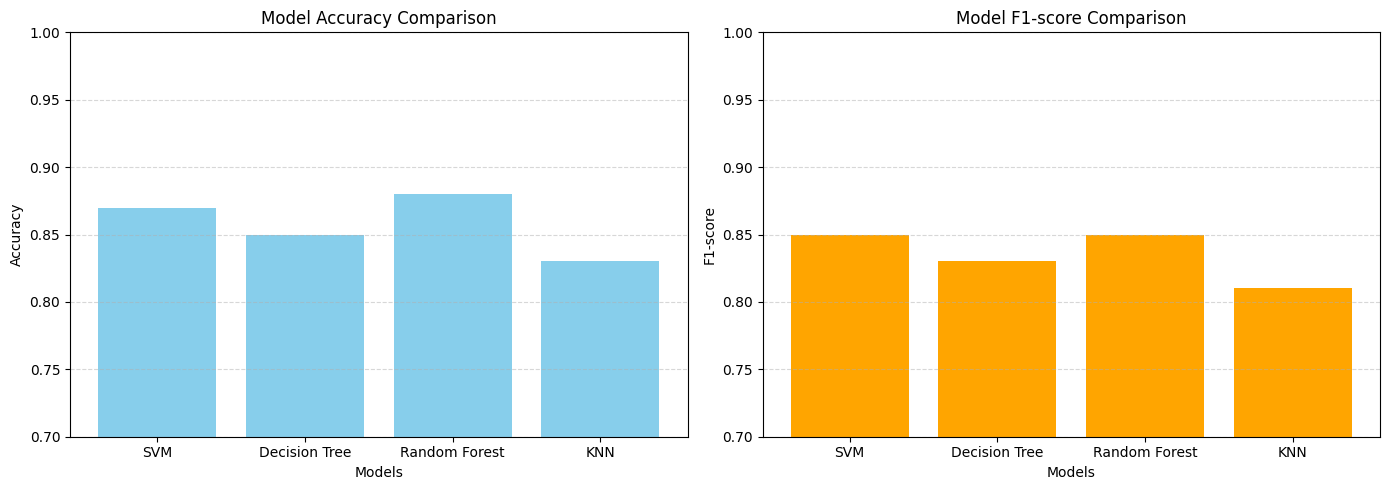

In [39]:
import matplotlib.pyplot as plt

# Model Names
models = ['SVM', 'Decision Tree', 'Random Forest', 'KNN']

# Accuracy and Macro F1-score values
accuracies = [0.87, 0.85, 0.88, 0.83]
f1_macro = [0.85, 0.83, 0.85, 0.81]

# Create subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy Plot
axes[0].bar(models, accuracies, color='skyblue')
axes[0].set_ylim(0.7, 1.0)
axes[0].set_title('Model Accuracy Comparison')
axes[0].set_xlabel('Models')
axes[0].set_ylabel('Accuracy')
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# F1-score Plot
axes[1].bar(models, f1_macro, color='orange')
axes[1].set_ylim(0.7, 1.0)
axes[1].set_title('Model F1-score Comparison')
axes[1].set_xlabel('Models')
axes[1].set_ylabel('F1-score')
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

# Layout adjustment
plt.tight_layout()
plt.show()